# Building Linear Regression model from Scratch.

This notebook explores the implementation of Simple and Multiple Linear Regression models from scratch using NumPy, and compares their performance to the corresponding models from the scikit-learn library. The models are applied to the USA Housing Dataset to predict house prices based on various features.

# Creating a Linear Regression Model from scrach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear Regression

### This section expores the implementation of simple linear Regression model with a simple example of of predicting the pizza price based on the size of the pizza where:

* X_pizza -- Contains the Size of Pizza in inches

* y_pizza -- Contains the price of the Pizza in dollars

In [2]:
X_pizza = [8,10,12]
y_pizza = [10,13,16]

### The below code cell contains a class named `SimpleLinearRegression` which contains multiple functions to perform each function for a Linear Regression model line `.fit()` and `.predict`.

* Simple Linear Regression where we have only one feature and one target variable.

* This uses the simple formula `y = mx + b`

  where:
    * y --> target Variable.
    * x --> feature variable.
    * m --> Slope or we can say how much y changes when we change x by 1 unit
    * b --> y-intecept or we can say the value of y when x is 0.

  * Slope `m` can be calculated using the formula

      `m = (Sum of product of deviation) / (Sum of square of deviation of X) `

      where:
      * `Sum of product of deviation` means first substracting all the values of X and Y in the data from mean of X and Y, then multiply each value of X deviation from its mean with the coressponding y deviation from its mean then calculatin the sum of these values.

      * `Sum of square of deviation of X` mean the deviation of all the x values from its mean we calculated are first squared then summed together.

  * y-intercept `b` can be calculated using the formula

      `b = (mean of y values) - (m * mean of X values)`

      where:

      * `m` is the slope we calculated using the above equation.
      * `mean of y values` and `mean of X values` are actualy what these tells can we calculated using `np.mean(X)` and `np.mean(y)`.

* After calculating these values we can calculate any values of y that is the price of pizza for any values of X that is the size of the pizza by putting the values of thse variables into the equation.


In [3]:
class SimpleLinearRegression:
  # Defining a init funtion to initiate slope and intercept
  def __init__(self):
    self.slope = None
    self.intercept = None

  # Defines the function to train the model with feature and variable
  def fit(self, x, y):
    # Convert pandas Series to NumPy arrays
    x = np.array(x)
    y = np.array(y)

    # Calculates the size of the X
    n = len(x)

    # Calculating the mean of X and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculating the sum of product of deviation of X and y from X_mean and y_mean
    sum_product_deviation = np.sum([(x[i] - x_mean) * (y[i] - y_mean) for i in range(n)])

    # Calculating the sum of squares of deviation of X from its mean
    sum_x_square_deviation = np.sum([(x[i] - x_mean) ** 2 for i in range(n)])

    # Calculating the slope and storing it in the slope variable defined above
    self.slope = sum_product_deviation / sum_x_square_deviation

    # Calculating the intercept and storing it in the intercept variable defined above
    self.intercept = y_mean - self.slope * x_mean

  # predict function for the simple linear regression
  def predict(self, x):
    # Convert pandas Series to NumPy array
    x = np.array(x)

    # using the formuala with intercept, slope and the given X values to get y
    return [self.slope * x[i] + self.intercept for i in range(len(x))]

  # This function calculates the R-squared error
  def score(self, x, y):
    # Convert pandas Series to NumPy arrays
    x = np.array(x)
    y = np.array(y)

    # gets all the predicted values of with X feature
    y_pred = self.predict(x)

    # Calculates the numerators of the formulla
    numerator = np.sum([(y[i] - y_pred[i]) ** 2 for i in range(len(y))])

    # Calculates the denominator of the formula
    denominator = np.sum([(y[i] - np.mean(y)) ** 2 for i in range(len(y))])

    # Returns the r-squared values using numerator and denominator variables
    return 1 - (numerator / denominator)

  # Calculates the mean squared error using actual y value and the predicted y values
  def mean_squared_error(self, y_true, y_pred):
    # Convert pandas Series to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # retuns the mean of sum of squared errors also known as MSE
    return np.mean([(y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))])


  # this one just returns the slope and intercept of the model.
  def get_params(self):
    return {'slope': self.slope, 'intercept': self.intercept}

### Training the Simple Linear Regression model.

  * First creating the object of the `SimpleLinearRegression` class defined above that will also initiate the variables of `slope` and `intercept` with none values.

  * Then training the model with `.fit()` funtion that will calculates the best values of `slope` and `intercept` for the given Pizza price and size pizza.

In [4]:
model = SimpleLinearRegression()
model.fit(X_pizza,y_pizza)

  * Let's see what are the best values of `slope` and `intercept` for this data by using `get_params()` funtion defined in the class.

In [5]:
print(model.get_params())

{'slope': 1.5, 'intercept': -2.0}


  * we get `slope` as `1.5` which mean if we change the value of X with 1 unit the y will change by 1.5.

  * Also we get the `intercept` as `-2` which means for `x = 0` we get `y = -2`

* Now let's define a new variable `X_test` which contains the new or unseen data of the size of pizza with size of `20,30,25` inches.

* Then using `.predict()` funtion we calculate the price of all these new sizes and print it.

In [6]:
X_test = [20,30,25]
print(model.predict(X_test))

[28.0, 43.0, 35.5]


### Performance metric and Loss Funtion

#### Performance metric:

  * This tells us that the pizza of sizes `20,30,25` can have the price oof `28,43,35.5` respectively.

* Now let's check the `R-squared Error` using the funtion defined in class `SimpleLinearRegression` with name `.score()`. which can be calculated mathematically using the formula:

    => Score = `1 - ((∑(y_actual - y_predicted)^2)) / (∑(y_actual - y_mean)^2))`

    where:
    * y_actual --> Actual price of the pizza.
    * y_predicted --> Predicted price for the same pizza
    * y_mean --> mean of y

    * This is used to chech how well our model is from the scale of `0 - 1` with 0 means worst and 1 means best meaning the values of score closer or 1 means a better model.

#### Loss Function:


* Then we calculated the `mean squared error` using function defined in the class `SimpleLinearRegression` with name `.mean_squared_error()` also known as `MSE`. which can be calculated mathematically using the formula:

    => `MSE = (∑(y_actual - y_predicted)^2) / n`

    where:
      -> n --> number or total observations.
      -> y_actual --> Actual price of the pizza.
      -> y_predicted --> Predicted price for the same pizza

    * This is nothing we are just calculating how much the actual value is different from the prediction value. That means the smaller it is the better our model is.



In [7]:
print("R-squared Score: ", model.score(X_pizza,y_pizza))
print("mean_square_erroe: ", model.mean_squared_error(y_pizza, model.predict(X_pizza)))

R-squared Score:  1.0
mean_square_erroe:  0.0


* For this modelwe can a score of 1 meaning it is the best model with this data.

* Also we get the mean squared error of 0 meaning this model is not getting any error on the traning data.

#### Let's visualize the model.

* Using a scatter plot and a line plot we can see the actual value and the predicted values and the regression line that can show us how the model performed.



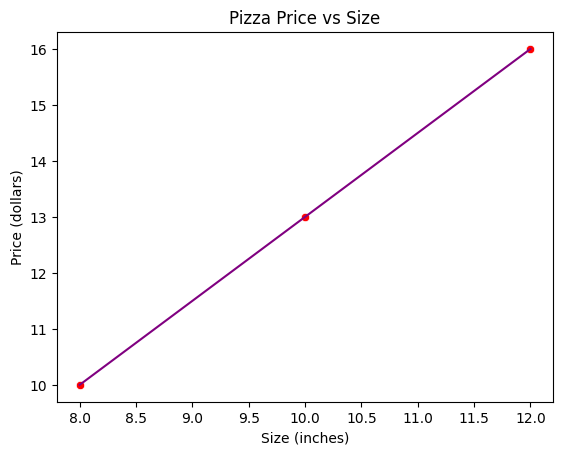

In [8]:
sns.scatterplot(x=X_pizza, y=y_pizza, color='red')
plt.plot(X_pizza, model.predict(X_pizza), color='purple')
plt.title("Pizza Price vs Size")
plt.xlabel("Size (inches)")
plt.ylabel("Price (dollars)")
plt.show()

* We can clearly see that the predicted values perfectly lies on the regression line meaning they don't have any error.

# Multiple Linear Regression

* This is used when we have more than one feature variable to predict one target variable. using more feature is best for accurate predictions.

Here we will use a simple example with 2 featues variable.

Example: Prediction of house prices based on Size of the house and the number of bedroom it contains.

  Here:

    # X1 -> Size of house in km-square(I know this is very large number but this one is just an example).
    X1 = [1, 2, 3]
    # X2 -> Number of bedroom in the house.
    X2 = [3, 4, 7]
    # y_house -> price of the house
    
    y_house = [2, 5, 9]

    # We need to get all the values of X1 and X2 in a single list so we created

    X_house = [[1, 3], [2, 4], [3, 7]]

In [9]:
X_house = [[1,3],[2,4],[3,7]]
y_house = [2,5,9]

### The Code cell below contains the code for the class named `MultipleLinearRegression` which simulates the actual Linear Regression for multiple features with the simple function like `.fit()` for training and `.predict()` for predictions.

* This can be done using maths with the formula:

    `y = b0 + b1X1 + b2X2 + ----- + bnXn`

    where:

    * y -> the value to predict.
    * X1, X2, X3, --- , Xn -> The feature variables.
    * b1, b2, b3, --- , bn -> The Coefficients or we can say the weights correspond to that feature.
    * b0 -> y-intercept as in the simple linear regression.

* In this example we have 2 feature variables that's why we will use formula:

  `y = b0 + b1X1 + b2X2`
  
  where:

  * y -> House of the price.
  * X1 -> Size of the house.
  * X2 -> Number of bedrooms.

* To calculates thes values of b0, b1 and b2 we will use metrix. So, we need to convert these in into metixes and apply the metrix equation.

  ```b_cap = (inverse(tranpose(X)X)transpose(X))Y```

  where:

  * b_cap -> contains the coefficients b0, b1, b2 in form of 3x1 metrix.
    
    ```
     b_cap = [b0
              b1
              b2]
    ```
  * X - > Contains the Values of X1 as 2nd column, X2 as 3rd column and an in the first column all values will be 1 in a 3x3 metrix. In this case

    ```
     X = [1, 1, 3
          1, 2, 4
          1, 3, 7]
    ```
  * Y -> contains the values of y or target variable in form of a 3x1 metrix. In this case

    ```
     Y = [2
          5
          9]
    ```

  * Now first we will transpose the metrix X and multiply it with the actualy metrix X using metrix multiplication. In this case we will get

  ```
   transpose(X)X = [3, 6, 14
                    6, 14, 32
                    14, 32, 74]
  ```

  * Then we will find the inverse of this new metrix. Usinf the actual procesure that will take time. I am writing the inverse directly.

  ```
    inverse(tranpose(x)X) = [3, 1, -1
                             1, 6.5, -3
                             -1, -3, 1.5]
  ```

  * Now Multiply it again with transpose of X and then multiply the new metrix with the metrix Y using metrix multiplication.

  ```
    (inverse(transpose(X)X)transpose(X))Y = b_cap = [-2
                                                     2.5
                                                     0.5]
  ```

  * This `b_cap` metrix is what we need and it contains the coeffients of b0, b1, b2.

  * And for prediction if we define some a 3x1 merix with the new 1, X1 and X2 and multiply the new metrix with this b_cap 3x1 metrix using metrix multiplication. Since, both these metrixes are 3x1 we will get a single value which will we the price of the house y for the new area and number of bed rooms.

In [10]:
# Defining the MultipleLinearRegression class
class MultipleLinearRegression:
  # Defining a init function to initiate the metrix coefficients with None values.
  def __init__(self):
    self.coefficients = None

  # Defining a fit function to train the model.
  def fit(self, X, y):
    X = np.array(X) # Convert to NumPy array for using numpy which will make the
    y = np.array(y) # Calculaton easier.

    # If we get a metrix in one dimension convert it to 2 dimension
    if X.ndim == 1:
        X = X.reshape(-1, 1) # Reshape to a 2D array if it's 1D

    # Defining a new metrix with only 1 values in all the places.
    ones_col = np.ones((X.shape[0], 1))

    # Ensure both arrays have the same number of rows before stacking
    if ones_col.shape[0] != X.shape[0]:
        raise ValueError("Number of rows in ones column and X must be the same for stacking.")

    # combining the ones_col and X metrix to form a single metrix
    X = np.hstack((ones_col, X))

    # Use np.linalg.solve for potentially better numerical stability
    self.coefficients = np.linalg.solve(X.T.dot(X), X.T.dot(y))

  # defining a predict function
  def predict(self, X):
    X = np.array(X) # Convert to NumPy array

    # Coverting 1D array to 2D array
    if X.ndim == 1:
        X = X.reshape(-1, 1) # Reshape to a 2D array if it's 1D

    # Creating a metrix with only 1 values in all the places
    ones_col = np.ones((X.shape[0], 1))

    # Combining the two metrixes
    X = np.hstack((ones_col, X))

    # Getting the prediction by multiplying the X to coefficients metrix
    # usinf dot multiplication.
    return X.dot(self.coefficients)

  # Defining a score function to calculate the R-squared error
  def score(self, X, y):
    X = np.array(X) # Convert to NumPy array
    y = np.array(y) # Convert to NumPy array
    y_pred = self.predict(X)
    numerator = np.sum([(y[i] - y_pred[i]) ** 2 for i in range(len(y))])
    denominator = np.sum([(y[i] - np.mean(y)) ** 2 for i in range(len(y))])
    return 1 - (numerator / denominator)

  # Calculating mean squared error
  def mean_squared_error(self, y_true, y_pred):
    y_true = np.array(y_true) # Convert to NumPy array
    y_pred = np.array(y_pred) # Convert to NumPy array
    return np.mean([(y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))])

  # Returing the coefficients of the model
  def get_params(self):
    return {'coefficients': self.coefficients}

### Training the `MultipleLinearRegression` model.

In [11]:
# Creating the object of the class
model1 = MultipleLinearRegression()

# Training the model using .fit function.
model1.fit(X_house,y_house)

### See all the coefficients.

In [12]:
# Gets all the coeffiecients for the model.
model1.get_params()

{'coefficients': array([-2. ,  2.5,  0.5])}

* Here we get `b0 = -2`, `b1 = 2.5` and `b2 = 0.5`

### Prediction

In [13]:
# Defining a new size and number of bedroom as a new data
X_house_test = np.array([[1.5,3]])

# Printing the prediction for these features
print(model1.predict(X_house_test))

[3.25]


* we get price of new house as 3.25 crores for the house 1.5 km square area with 3 bed rooms.

### Performance Metrices.

* Let's calculate the `R-squared error` and the `mean squared error` as we done in simple linear regression

In [14]:
print("R-squared error", model1.score(X_house,y_house))
print("mean_square_error", model1.mean_squared_error(y_house, model1.predict(X_house)))

R-squared error 1.0
mean_square_error 1.314768175368353e-30


* Here for these small data we get a perfect score of 1 for `R-squared error` and error in the form of `10^-29` which is a very small number for mean square error we can say that it does not have any error.

### Let's visualize it using scatter plot

/tmp/ipykernel_13/3680185400.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([np.array(y_house).min(), np.array(y_house).max()], [np.array(y_house).min(), np.array(y_house).max()], 'k--', lw=2, color='red')


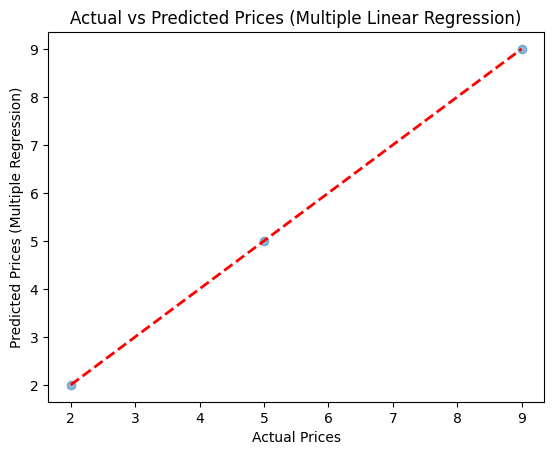

In [15]:
plt.scatter(y_house, model1.predict(X_house), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Multiple Regression)")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
# Add a line representing perfect prediction
plt.plot([np.array(y_house).min(), np.array(y_house).max()], [np.array(y_house).min(), np.array(y_house).max()], 'k--', lw=2, color='red')
plt.show()

# Lets use a Real Dataset to test performance of this model.

# USA Housing Data

In [16]:
# Importing the data
house_df = pd.read_csv("/kaggle/input/usa-house-price/USA Housing Dataset.csv")

# Get a look at data
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [17]:
# See the number of rows and column of the data frame
house_df.shape

(4140, 18)

* That's a lot of data.

In [18]:
# getting number of null values in all columns.
house_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

* This Data does not contain any null values that good of us.

In [19]:
# Gets all the columns with numerical data
num_cols = house_df.select_dtypes(include=np.number).columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

* Seperated all the features with numerical values.

### Creating the feature variable as X and target variable as y

In [20]:
# X contains all the numerical columns except fr 'price'
X = house_df[num_cols].drop('price', axis=1)

# y contains our target variable
y = house_df['price']

### Splitting the data into training and testing data for checking how our model performs on unseen data.

In [21]:
# Importing the train_test_split function from sklean
from sklearn.model_selection import train_test_split

# Seperating the 80% data as test and 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model which was created above

* Since the Simple Linear Regression model accept only one `feature` I am using `sqft_living` from this `house_df` dataframe.

In [22]:
# Initiating SimpleLinearRegression which was created above
simple_house_model = SimpleLinearRegression()

# Training the our model on test data
simple_house_model.fit(X_train['sqft_living'], y_train)

### Predicting the test data and checking the performance metrices

In [23]:
# Storing all the prediction in a varable named y_pred
y_pred = simple_house_model.predict(X_test['sqft_living'])

# Printing the R-squared error using .score() function from the same class
print(simple_house_model.score(X_test['sqft_living'], y_test))

# Printing the mean square error from the same class
print(np.sqrt(simple_house_model.mean_squared_error(y_test, y_pred)))

0.2882612953080661
273158.27622609667


* This both metrices are not the much good number for being that confident about out prediction.

* But How well our model performed as compare to the actual LinearRegresion model from sklearn library. Let's check this.

In [24]:
# Importing the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# This model means to get mean squre error imported from metrics
from sklearn.metrics import mean_squared_error

# Initiating the model
sk_simple_model = LinearRegression()

# Traning the model
sk_simple_model.fit(X_train[['sqft_living']], y_train)

# Predicting the test data
y_sk_pred = sk_simple_model.predict(X_test[['sqft_living']])

# Printing the score and mean squared error
print(sk_simple_model.score(X_test[['sqft_living']], y_test))
print(np.sqrt(mean_squared_error(y_test, y_sk_pred)))

0.2882612953080661
273158.27622609667


* Both The model we defined and the model from sklearn performed same as we can see both have same score and mean square error.

### Let's visualize the data and the regression line

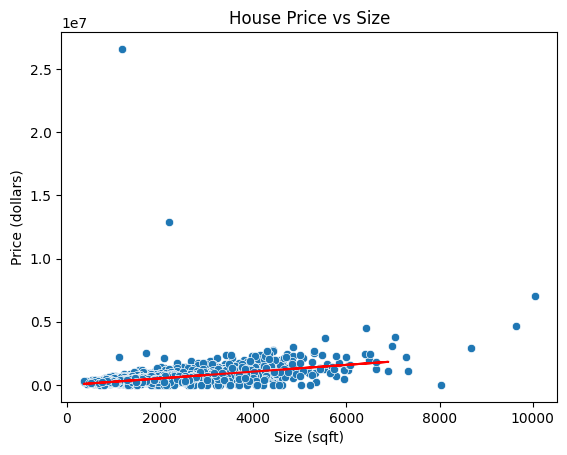

In [25]:
# Scatters the data in the plot
sns.scatterplot(x=X['sqft_living'], y=y)

# Plotting the regression line
plt.plot(X_test['sqft_living'], y_pred, color='red')

# Setting the title
plt.title("House Price vs Size")

# Setting the x and the y labels
plt.xlabel("Size (sqft)")
plt.ylabel("Price (dollars)")

# Shows the graph
plt.show()

### Let's see the `MultipleLinearRegression` model on tha actual data.

In [26]:
# Initiating the model
multiple_house_model = MultipleLinearRegression()

# Training the the model with all the numerical columns
multiple_house_model.fit(X_train, y_train)

### Predicting the test data

In [27]:
# Predicting the test data
mul_y_pred = multiple_house_model.predict(X_test)

# Calculating the score and the mean squared error
print(multiple_house_model.score(X_test, y_test))
print(np.sqrt(multiple_house_model.mean_squared_error(y_test, mul_y_pred)))

0.37394569161796354
256188.7625349853


* AS we can see the score is not that improved as compared to the linear model but this one is also not that much to be confident about our prediction.

* This score can we improved using the some methods like features creation, stanadardization etc.

* Let's cmpare it with the actual model from sklearn.

In [28]:
# Initiating the model
sk_multiple_model =  LinearRegression()

# Traning the model
sk_multiple_model.fit(X_train, y_train)

# Predictin the test data
sk_mul_y_pred = sk_multiple_model.predict(X_test)

# Getting the score and mean square error.
print(sk_multiple_model.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, sk_mul_y_pred)))

0.37475248028195784
256023.635628725


* Both our model and the sklearn model performs same for this datasets.

### Let's visualize the prediected values and regression line

/tmp/ipykernel_13/3385365854.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


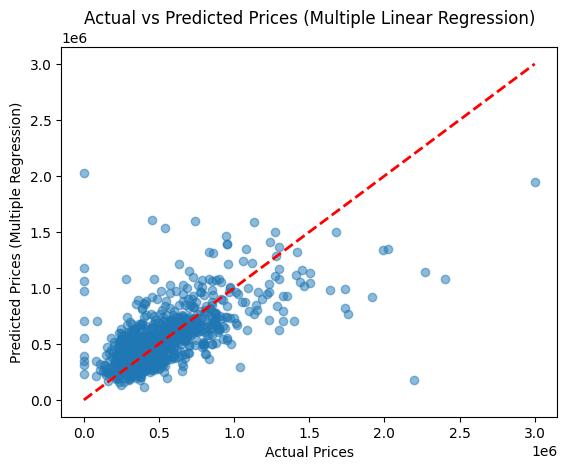

In [29]:
# Scatters the actual and predicted values on the graph
plt.scatter(y_test, mul_y_pred, alpha=0.5)

# Setting the x-label and y-label
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Multiple Regression)")

# giving a title to the graph
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")

# Add a line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.show()

# Notebook Summary Report

This notebook demonstrates the implementation of Simple and Multiple Linear Regression models from scratch using NumPy. It also compares the performance of these custom models with the corresponding models from the scikit-learn library.

**Key Sections:**

*   **Simple Linear Regression:** Implements a simple linear regression model from scratch using the formula `y = mx + b`. It includes methods for fitting the model, making predictions, calculating the R-squared score, and calculating the Mean Squared Error (MSE). A simple example with pizza size and price is used for demonstration.
*   **Multiple Linear Regression:** Implements a multiple linear regression model from scratch using matrix operations (the normal equation). It includes methods for fitting the model, making predictions, calculating the R-squared score, and calculating the MSE. A simple example with house size and number of bedrooms is used for demonstration.
*   **Real Dataset Application:** Applies both the custom-built Simple and Multiple Linear Regression models and the scikit-learn versions to the USA Housing Dataset to predict house prices. The performance of the models is evaluated using R-squared and RMSE (Root Mean Squared Error).

**Dataset:**

*   **USA Housing Dataset:** This dataset is used to test the performance of the implemented models on real-world data. It contains various features related to houses and their corresponding prices.

**Model Comparison:**

The notebook compares the performance metrics (R-squared and RMSE) of the custom-built models with the scikit-learn models on the USA Housing Dataset, showing that the custom implementations yield similar results to the established library.

**Visualizations:**

The notebook includes visualizations to show the relationship between features and the target variable, as well as the performance of the linear regression models.

**Conclusion:**

The notebook successfully demonstrates the implementation of linear regression models from scratch and validates their performance against scikit-learn's implementations using a real-world dataset.